In [179]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import datetime

In [60]:
# load data
data = pd.read_excel("pokemon.xlsx")
data.head()

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,Nan,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",Nan,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


# Get all Pokemons whose spawn rate is less than 5%

In [6]:
spawn_less_then_5_percentage = data[data['spawn_chance'] < 0.05]
spawn_less_then_5_percentage

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,Nan,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",Nan,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
4,4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,Nan,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",Nan,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
7,7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100,Not in Eggs,0.0340,3.40,07:02,[1.4],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",Nan,NaN
147,147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,Nan,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",Nan,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",Nan,NaN


In [432]:
explode = [0.08 for i in range(len(spawn_less_then_5_percentage))]

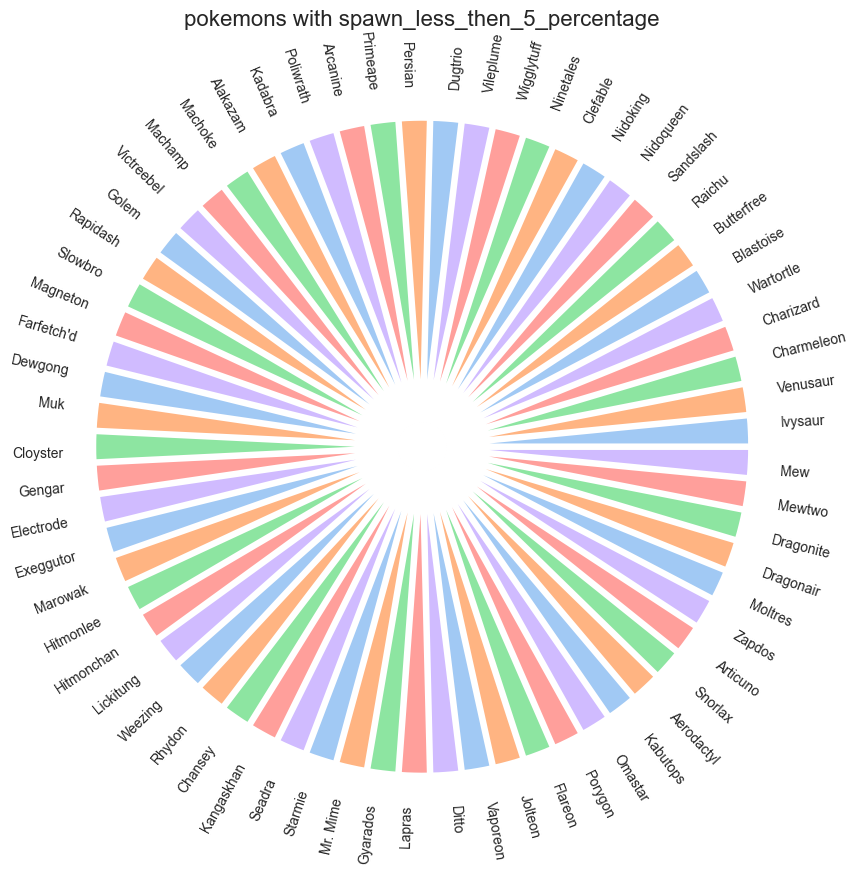

In [434]:
plt.figure(figsize=(9,9))

colors = sns.color_palette('pastel')[0:5]

plt.pie(spawn_less_then_5_percentage['name'].value_counts(),colors=colors, labels=spawn_less_then_5_percentage['name'],
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-small'},explode=explode,rotatelabels=True);
plt.title(
    label="pokemons with spawn_less_then_5_percentage", 
    fontdict={"fontsize":16},
    pad=30)

plt.tight_layout()

plt.show()

# Get all Pokemons that have less than 4 weaknesses

In [104]:
#perform some preprocessing
data['weaknesses']=data['weaknesses'].apply(lambda x : re.findall('\w[a-zA-Z]\w', x))

In [111]:
less_than_4_weaknesses = []
for i in range(len(data['weaknesses'])):
    if len(data['weaknesses'][i]) < 4:
        less_than_4_weaknesses.append(data.iloc[i])

In [112]:
less_than_4_weaknesses = pd.DataFrame(less_than_4_weaknesses)
less_than_4_weaknesses

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
6,6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25,2 km,0.5800,58.000,04:25,[2.1],"[Ele, ctr, Gra]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN
7,7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100,Not in Eggs,0.0340,3.400,07:02,[1.4],"[Ele, ctr, Gra]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
8,8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,Nan,Not in Eggs,0.0067,0.670,00:06,NaN,"[Ele, ctr, Gra]",Nan,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
15,15,16,16,Pidgey,http://www.serebii.net/pokemongo/pokemon/016.png,"['Normal', 'Flying']",0.30 m,1.8 kg,Pidgey Candy,12,2 km,15.9800,1.598,01:34,"[1.71, 1.92]","[Ele, ctr, Roc]","[{'num': '017', 'name': 'Pidgeotto'}, {'num': ...",NaN
16,16,17,17,Pidgeotto,http://www.serebii.net/pokemongo/pokemon/017.png,"['Normal', 'Flying']",1.09 m,30.0 kg,Pidgey Candy,50,Not in Eggs,1.0200,102.000,01:30,[1.79],"[Ele, ctr, Roc]","[{'num': '018', 'name': 'Pidgeot'}]","[{'num': '016', 'name': 'Pidgey'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,['Normal'],0.79 m,36.5 kg,None,Nan,5 km,0.0120,1.200,02:49,NaN,"[Fig, hti]",Nan,NaN
142,142,143,143,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,['Normal'],2.11 m,460.0 kg,None,Nan,10 km,0.0160,1.600,23:40,NaN,"[Fig, hti]",Nan,NaN
144,144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,None,Nan,Not in Eggs,0.0000,0.000,NaN,NaN,"[Ice, Roc]",Nan,NaN
149,149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,Nan,Not in Eggs,0.0000,0.000,NaN,NaN,"[Bug, Gho, Dar]",Nan,NaN


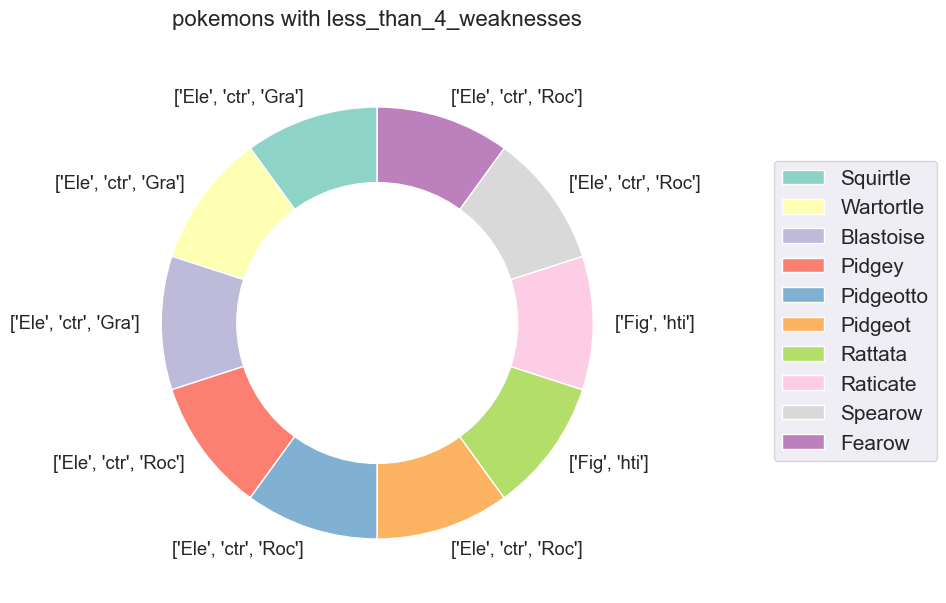

In [384]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(12,12))

plt.pie(
    x=less_than_4_weaknesses['name'][0:10].value_counts(), 
    labels=less_than_4_weaknesses['weaknesses'][0:10],
    colors=sns.color_palette('Set3'),
    startangle=90
)


hole = plt.Circle((0, 0), 0.65, facecolor='white')

plt.gcf().gca().add_artist(hole)
plt.legend(less_than_4_weaknesses['name'][0:10],bbox_to_anchor=(0.7,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title(
    label="pokemons with less_than_4_weaknesses", 
    fontdict={"fontsize":16},
    pad=20)
plt.show()

# Get all Pokemons that have no multipliers at all

In [123]:
no_multipliers = data[data['multipliers'].isnull()]
no_multipliers

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
2,2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,Nan,Not in Eggs,0.0170,1.70,11:30,NaN,"[Fir, Ice, Fly, ing, Psy, chi]",Nan,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,Nan,Not in Eggs,0.0031,0.31,13:34,NaN,"[Wat, Ele, ctr, Roc]",Nan,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
8,8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,Nan,Not in Eggs,0.0067,0.67,00:06,NaN,"[Ele, ctr, Gra]",Nan,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
11,11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"['Bug', 'Flying']",1.09 m,32.0 kg,Caterpie Candy,Nan,Not in Eggs,0.0220,2.20,05:23,NaN,"[Fir, Ele, ctr, Ice, Fly, ing, Roc]",Nan,"[{'num': '010', 'name': 'Caterpie'}, {'num': '..."
14,14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"['Bug', 'Poison']",0.99 m,29.5 kg,Weedle Candy,Nan,Not in Eggs,0.0510,5.10,04:50,NaN,"[Fir, Fly, ing, Psy, chi, Roc]",Nan,"[{'num': '013', 'name': 'Weedle'}, {'num': '01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"[Ice, Roc]",Nan,NaN
145,145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"[Wat, Ele, ctr, Roc]",Nan,NaN
148,148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,Nan,Not in Eggs,0.0011,0.11,23:38,NaN,"[Ice, Roc, Dra, gon, Fai]",Nan,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"[Bug, Gho, Dar]",Nan,NaN


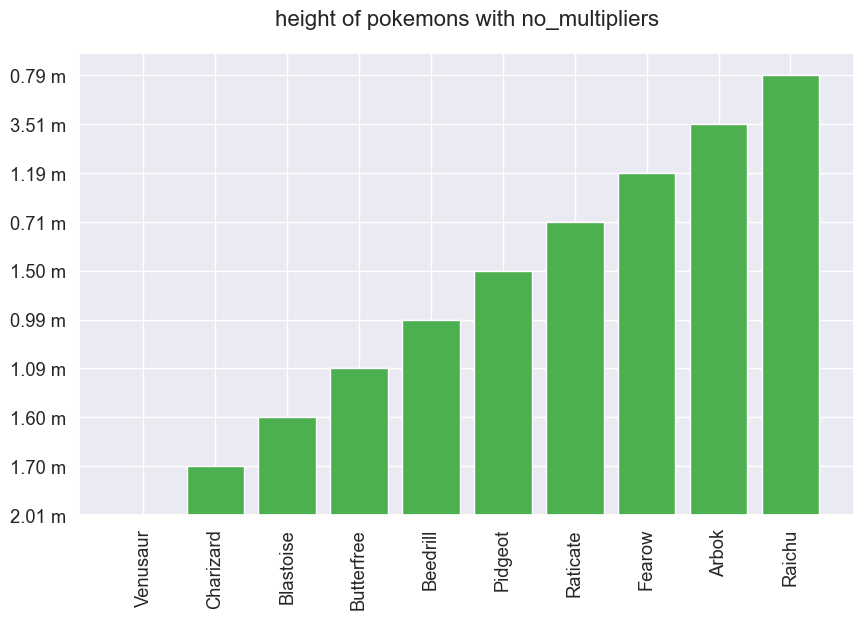

In [451]:
x= no_multipliers['name'][0:10]
y = no_multipliers['height'][0:10]

plt.figure(figsize=(10, 6))

plt.xticks(rotation=90)
plt.title(
    label="height of pokemons with no_multipliers", 
    fontdict={"fontsize":16},
    pad=20)
plt.bar(x,y,color = "#4CAF50");

# Get all Pokemons that do not have more than 2 evolutions

In [145]:
#perform some preprocessing
data['next_evolution']=data['next_evolution'].apply(lambda x: re.findall(r"\{(.*?)\}",x))

In [172]:
not_more_then_2_evalutions = []
for i in range(len(data['next_evolution'])):
    if len(data['next_evolution'][i]) < 2:
        not_more_then_2_evalutions.append(data.iloc[i])

In [175]:
not_more_then_2_evalutions = pd.DataFrame(not_more_then_2_evalutions)
not_more_then_2_evalutions

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fir, Ice, Fly, ing, Psy, chi]","['num': '003', 'name': 'Venusaur']","[{'num': '001', 'name': 'Bulbasaur'}]"
2,2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,Nan,Not in Eggs,0.0170,1.70,11:30,NaN,"[Fir, Ice, Fly, ing, Psy, chi]",[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
4,4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Wat, Gro, und, Roc]","['num': '006', 'name': 'Charizard']","[{'num': '004', 'name': 'Charmander'}]"
5,5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,Nan,Not in Eggs,0.0031,0.31,13:34,NaN,"[Wat, Ele, ctr, Roc]",[],"[{'num': '004', 'name': 'Charmander'}, {'num':..."
7,7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Ele, ctr, Gra]","['num': '009', 'name': 'Blastoise']","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"[Wat, Ele, ctr, Roc]",[],NaN
147,147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dra, gon, Fai]","['num': '149', 'name': 'Dragonite']","[{'num': '147', 'name': 'Dratini'}]"
148,148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,Nan,Not in Eggs,0.0011,0.11,23:38,NaN,"[Ice, Roc, Dra, gon, Fai]",[],"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,Nan,Not in Eggs,0.0000,0.00,NaN,NaN,"[Bug, Gho, Dar]",[],NaN


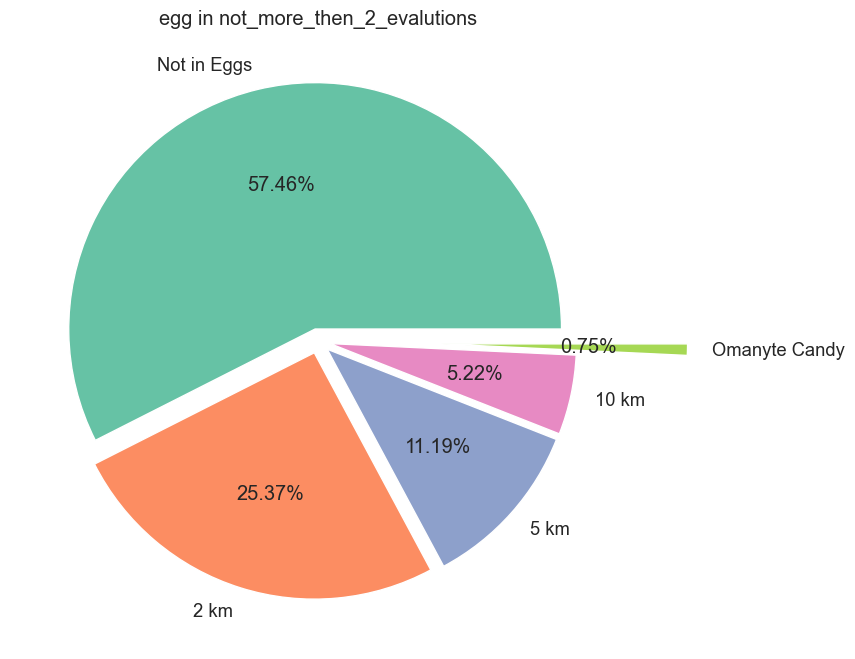

In [493]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

plt.pie(
    x=not_more_then_2_evalutions['egg'].value_counts(), 
    labels=not_more_then_2_evalutions['egg'].unique(),
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    explode=[0.05, 0.05, 0.05, 0.05,0.5]
)

plt.xticks(rotation=90)
plt.title(
    label="egg in not_more_then_2_evalutions")
plt.show()

# Get all Pokemons whose spawn time is less than 300 seconds.


In [177]:
# 300 seconds == 5 minutes

In [187]:
float(data['spawn_time'][0].split(":")[0]) < 5

False

In [237]:
data['spawn_time']=data['spawn_time'].fillna("00:00")

In [238]:
spawn_time_less_then_300_sec = []
for i in range(len(data['spawn_time'])):
    time = data['spawn_time'][i].split(":")[0]
    if type(time) == float:
        time = str(time)
    #print(type(time))
    if 5 > int(time):
        spawn_time_less_then_300_sec.append(data.iloc[i])
        

In [241]:
spawn_time_less_then_300_sec=pd.DataFrame(spawn_time_less_then_300_sec)
spawn_time_less_then_300_sec

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
6,6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25,2 km,0.5800,58.00,04:25,[2.1],"[Ele, ctr, Gra]","['num': '008', 'name': 'Wartortle', 'num': '00...",NaN
8,8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,Nan,Not in Eggs,0.0067,0.67,00:06,NaN,"[Ele, ctr, Gra]",[],"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
10,10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71 m,9.9 kg,Caterpie Candy,50,Not in Eggs,0.1870,18.70,02:11,"[3.55, 3.79]","[Fir, Fly, ing, Roc]","['num': '012', 'name': 'Butterfree']","[{'num': '010', 'name': 'Caterpie'}]"
12,12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"['Bug', 'Poison']",0.30 m,3.2 kg,Weedle Candy,12,2 km,7.1200,712.00,02:21,"[1.01, 1.09]","[Fir, Fly, ing, Psy, chi, Roc]","['num': '014', 'name': 'Kakuna', 'num': '015',...",NaN
13,13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"['Bug', 'Poison']",0.61 m,10.0 kg,Weedle Candy,50,Not in Eggs,0.4400,44.00,02:30,"[3.01, 3.41]","[Fir, Fly, ing, Psy, chi, Roc]","['num': '015', 'name': 'Beedrill']","[{'num': '013', 'name': 'Weedle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,143,144,144,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"['Ice', 'Flying']",1.70 m,55.4 kg,None,Nan,Not in Eggs,0.0000,0.00,00:00,NaN,"[Fir, Ele, ctr, Roc, Ste]",[],NaN
144,144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,None,Nan,Not in Eggs,0.0000,0.00,00:00,NaN,"[Ice, Roc]",[],NaN
145,145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,Nan,Not in Eggs,0.0000,0.00,00:00,NaN,"[Wat, Ele, ctr, Roc]",[],NaN
149,149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,Nan,Not in Eggs,0.0000,0.00,00:00,NaN,"[Bug, Gho, Dar]",[],NaN


In [488]:
spawn_time_less_then_300_sec['spawn_time'].value_counts()[0:5].index

Index(['00:00', '01:51', '01:32', '01:50', '02:15'], dtype='object')

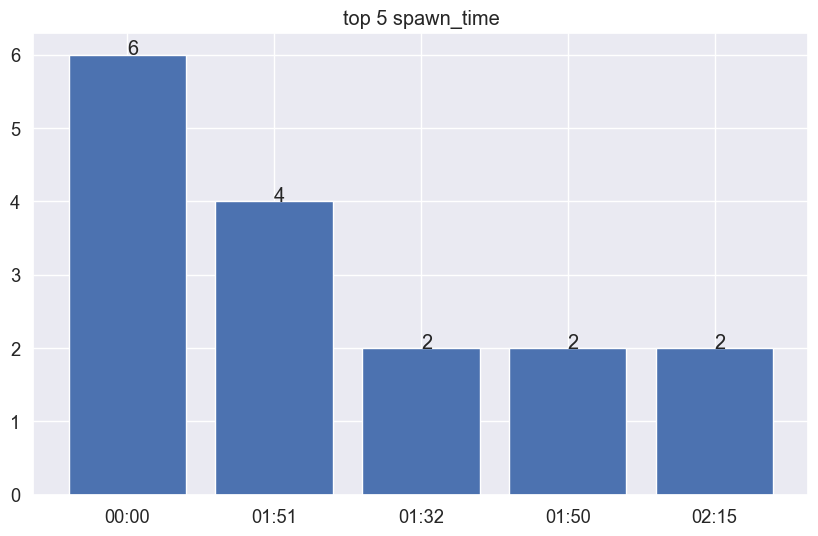

In [494]:
x = spawn_time_less_then_300_sec['spawn_time'].value_counts()[0:5].index
y=spawn_time_less_then_300_sec['spawn_time'].value_counts()[0:5]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig = plt.figure(figsize=(10, 6))
addlabels(x,y)
plt.title("top 5 spawn_time")

plt.bar(x,y);

# Get all Pokemon who have more than two types of capabilities

In [244]:
#perform some preprocessing
data['type']=data['type'].apply(lambda x : re.findall('\w[a-zA-Z]\w', x))

In [248]:
more_than_2_capabilities = []
for i in range(len(data['type'])):
    if len(data['type'][i]) > 2:
        more_than_2_capabilities.append(data.iloc[i])

In [252]:
more_than_2_capabilities = pd.DataFrame(more_than_2_capabilities)
more_than_2_capabilities

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Gra, Poi, son]",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.6900,69.000,20:00,[1.58],"[Fir, Ice, Fly, ing, Psy, chi]","['num': '002', 'name': 'Ivysaur', 'num': '003'...",NaN
1,1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Gra, Poi, son]",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.0420,4.200,07:00,"[1.2, 1.6]","[Fir, Ice, Fly, ing, Psy, chi]","['num': '003', 'name': 'Venusaur']","[{'num': '001', 'name': 'Bulbasaur'}]"
2,2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Gra, Poi, son]",2.01 m,100.0 kg,Bulbasaur Candy,Nan,Not in Eggs,0.0170,1.700,11:30,NaN,"[Fir, Ice, Fly, ing, Psy, chi]",[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fir, Fly, ing]",1.70 m,90.5 kg,Charmander Candy,Nan,Not in Eggs,0.0031,0.310,13:34,NaN,"[Wat, Ele, ctr, Roc]",[],"[{'num': '004', 'name': 'Charmander'}, {'num':..."
11,11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Fly, ing]",1.09 m,32.0 kg,Caterpie Candy,Nan,Not in Eggs,0.0220,2.200,05:23,NaN,"[Fir, Ele, ctr, Ice, Fly, ing, Roc]",[],"[{'num': '010', 'name': 'Caterpie'}, {'num': '..."
12,12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"[Bug, Poi, son]",0.30 m,3.2 kg,Weedle Candy,12,2 km,7.1200,712.000,02:21,"[1.01, 1.09]","[Fir, Fly, ing, Psy, chi, Roc]","['num': '014', 'name': 'Kakuna', 'num': '015',...",NaN
13,13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"[Bug, Poi, son]",0.61 m,10.0 kg,Weedle Candy,50,Not in Eggs,0.4400,44.000,02:30,"[3.01, 3.41]","[Fir, Fly, ing, Psy, chi, Roc]","['num': '015', 'name': 'Beedrill']","[{'num': '013', 'name': 'Weedle'}]"
14,14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poi, son]",0.99 m,29.5 kg,Weedle Candy,Nan,Not in Eggs,0.0510,5.100,04:50,NaN,"[Fir, Fly, ing, Psy, chi, Roc]",[],"[{'num': '013', 'name': 'Weedle'}, {'num': '01..."
15,15,16,16,Pidgey,http://www.serebii.net/pokemongo/pokemon/016.png,"[Nor, mal, Fly, ing]",0.30 m,1.8 kg,Pidgey Candy,12,2 km,15.9800,1.598,01:34,"[1.71, 1.92]","[Ele, ctr, Roc]","['num': '017', 'name': 'Pidgeotto', 'num': '01...",NaN
16,16,17,17,Pidgeotto,http://www.serebii.net/pokemongo/pokemon/017.png,"[Nor, mal, Fly, ing]",1.09 m,30.0 kg,Pidgey Candy,50,Not in Eggs,1.0200,102.000,01:30,[1.79],"[Ele, ctr, Roc]","['num': '018', 'name': 'Pidgeot']","[{'num': '016', 'name': 'Pidgey'}]"


In [530]:
more_than_2_capabilities['type'].astype(str).value_counts()

20

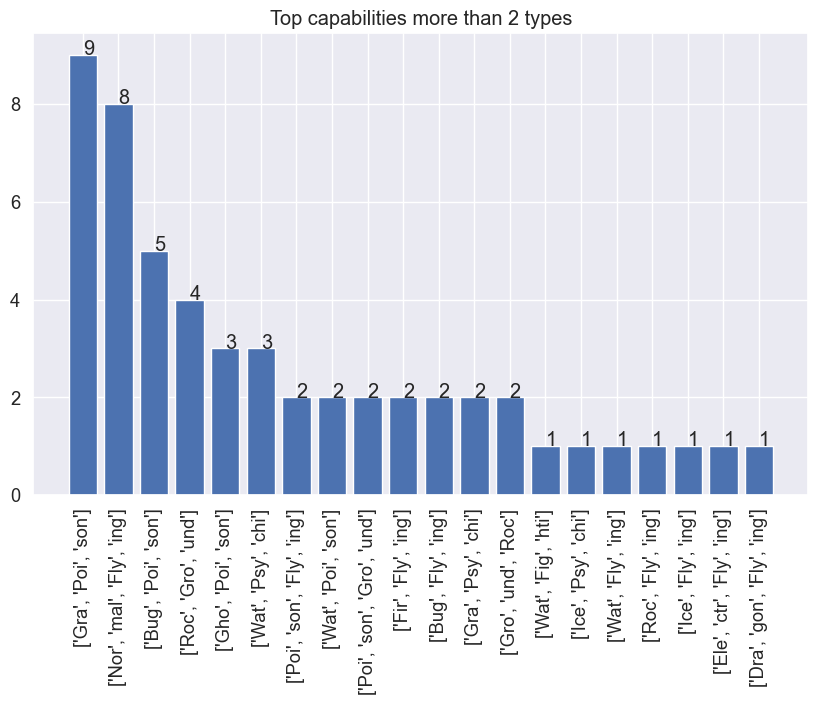

In [545]:
x=more_than_2_capabilities['type'].astype(str).value_counts().index
y = more_than_2_capabilities['type'].astype(str).value_counts().values
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig = plt.figure(figsize=(10, 6))
addlabels(x,y)
plt.xticks(rotation=90)
plt.title("Top capabilities more than 2 types")


plt.bar(x,y);